<h2><span style="color: rgb(41, 105, 176); font-size: 22px;">PROJECT ENSEMBLE TECHNIQUES - MEDICAL FIELD</span></h2>

<p><span style="color: rgb(41, 105, 176); font-family: Calibri, sans-serif; font-size: 20px;">Import necessary libraries</span></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p><span style="font-family: Calibri, sans-serif; font-size: 20px; color: rgb(41, 105, 176);">1. Load the dataset</span></p>

In [2]:
park = pd.read_csv('Data - Parkinsons')

In [3]:
# column names
park.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

<p><span style="color: rgb(44, 130, 201); font-family: Calibri, sans-serif; font-size: 20px;"><strong><u>Attribute Information</u></strong></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif; color: rgb(41, 105, 176);">Matrix column entries (attributes):</span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">name -&gt; </span></span><span style="font-family: Calibri, sans-serif; color: rgb(0, 0, 0);">ASCII subject name and recording number</span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">MDVP:Fo(Hz) -&gt; </span></span><span style="font-family: Calibri, sans-serif; color: rgb(0, 0, 0);">Average vocal fundamental frequency</span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">MDVP:Fhi(Hz) -&gt; </span><span style="color: rgb(0, 0, 0);">Maximum vocal fundamental frequency</span></span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">MDVP:Flo(Hz) -&gt; </span><span style="color: rgb(0, 0, 0);">Minimum vocal fundamental frequency</span></span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP -&gt; </span><span style="color: rgb(0, 0, 0);">Several measures of variation in fundamental frequency</span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA -&gt; </span><span style="color: rgb(0, 0, 0);">Several measures of variation in amplitude</span></span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">NHR,HNR -&gt; </span><span style="color: rgb(0, 0, 0);">Two measures of ratio of noise to tonal components in the voice</span></span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">status -&gt; </span><span style="color: rgb(0, 0, 0);">Health status of the subject (one) - Parkinson&#39;s, (zero) - healthy</span></span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">RPDE,D2 -&gt; </span><span style="color: rgb(0, 0, 0);">Two nonlinear dynamical complexity measures</span></span></span></p>
<p><span style="font-size: 16px;"><span style="font-family: Calibri, sans-serif;"><span style="color: rgb(44, 130, 201);">DFA -&gt; </span><span style="color: rgb(0, 0, 0);">Signal fractal scaling exponent</span></span></span></p>
<p><span style="color: rgb(44, 130, 201); font-family: Calibri, sans-serif; font-size: 16px;">spread1,spread2,PPE -&gt; </span><span style="color: rgb(0, 0, 0); font-family: Calibri, sans-serif; font-size: 16px;">Three nonlinear measures of fundamental frequency variation</span><span style="color: rgb(44, 130, 201); font-family: Calibri, sans-serif; font-size: 16px;">&nbsp;</span></p>

In [4]:
#using index values from 0 to 194 instead of ASCII values for names and converting to string
park['name']=park.index
park = park.astype({"name":str})

<p><span style="color: rgb(41, 105, 176); font-family: Calibri, sans-serif; font-size: 20px;">2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard.</span></p>

In [5]:
park.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    0      119.992       157.302        74.997         0.00784   
1    1      122.400       148.650       113.819         0.00968   
2    2      116.682       131.111       111.555         0.01050   
3    3      116.676       137.871       111.366         0.00997   
4    4      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [6]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
park.dtypes.value_counts()

float64    22
object      1
int64       1
dtype: int64

In [8]:
park.shape

(195, 24)

In [9]:
park.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**The data has 195 rows/obsevations and 24 columns/attributes.All the independent variables are continuous in nature and no null value is present.The name attribute should be dropped as it will not be used for final model building.**

In [10]:
park.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

**Although the data will not require imputation as it has no categorical independent variables , it will require standardization as the models we will be using are all affected by 
range of continuous variables such as KNN etc.We may also need to remove outliers, however since there are very few observations in the given data, this may not be possible.The other challenges that we may face during model building is that there are a lot of attributes and we may need to drop the attributes that have a very high correlation.**

<p><span style="color: rgb(41, 105, 176); font-family: Calibri, sans-serif; font-size: 20px;">3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations.</span></p>

<p><span style="font-family: Calibri, sans-serif; font-size: 19px;"><strong><em>Univariate Analysis of the Attributes</em></strong></span></p>

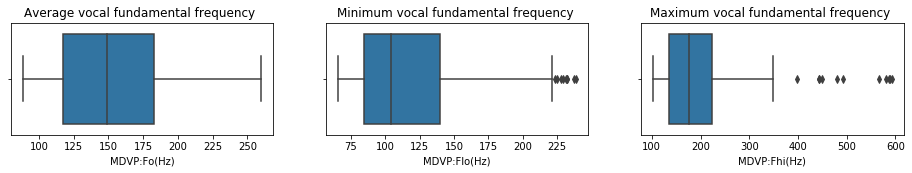

In [11]:
plt.figure(figsize=(16,7))
plt.subplot(3,3,1)
sns.boxplot(park['MDVP:Fo(Hz)'])
plt.title('Average vocal fundamental frequency ')
plt.subplot(3,3,2)
sns.boxplot(park['MDVP:Flo(Hz)'])
plt.title('Minimum vocal fundamental frequency ')
plt.subplot(3,3,3)
sns.boxplot(park['MDVP:Fhi(Hz)'])
plt.title('Maximum vocal fundamental frequency ')
plt.show()

**The maximum vocal fundamental frequency has maximum ouliers while average vocal fundamental frequency has no outliers.Both minimum and maximim fundamental frequency are highly right skewed.**

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(park['MDVP:Fo(Hz)'],color = 'k',hist=False,label='Average vocal fundamental frequency',axlabel=False)
sns.distplot(park['MDVP:Flo(Hz)'],color='red',hist=False,label='Minimum vocal fundamental frequency',axlabel=False)
sns.distplot(park['MDVP:Fhi(Hz)'],color= 'blue',hist=False,label='Maximum vocal fundamental frequency',axlabel=False)
plt.legend()
plt.show()

**As expected the average fundamental frquency is between maximum and minimum values. However we can see that the distribution of average fundamental values is closest to the normal ditribution with minimum skewness while the distribution of Maximum fundamental frequency is right skewed with very high kurtosis value.This may be due to the fact that people with and without Parkinsons's may have very different frequency on exertion causing distortion to the voice.**

In [13]:
park['MDVP:Fo(Hz)'].skew(),park['MDVP:Flo(Hz)'].skew(),park['MDVP:Fhi(Hz)'].skew()

(0.5917374636540784, 1.217350448627808, 2.542145997588398)

In [14]:
park['MDVP:Fo(Hz)'].kurtosis(),park['MDVP:Flo(Hz)'].kurtosis(),park['MDVP:Fhi(Hz)'].kurtosis()

(-0.6278981066788805, 0.6546145211395396, 7.627241211631889)

In [15]:
plt.figure(figsize=(25,5))
sns.scatterplot(x=park['name'],y=park['MDVP:Fo(Hz)'],color='blue')
sns.scatterplot(x=park['name'],y=park['MDVP:Flo(Hz)'],color='red')
sns.scatterplot(x=park['name'],y=park['MDVP:Fhi(Hz)'],color='green')
plt.xticks(rotation=90)
plt.show()

**This scatterplots tells us that there are a lot of outliers in the high fundamental frequency range.**

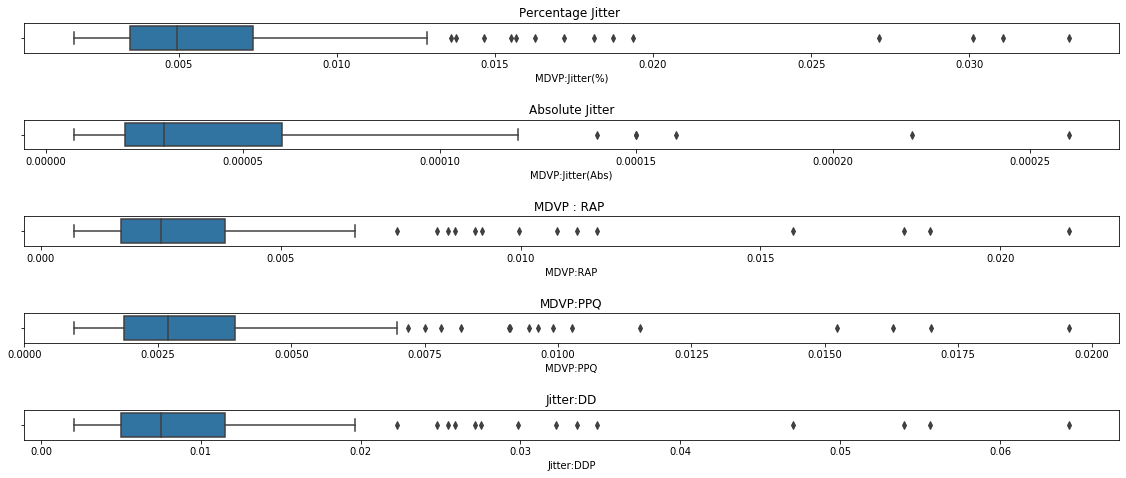

In [16]:
plt.figure(figsize=(16,7))
plt.subplot(5,1,1)
sns.boxplot(park['MDVP:Jitter(%)'])
plt.title('Percentage Jitter ')
plt.subplot(5,1,2)
sns.boxplot(park['MDVP:Jitter(Abs)'])
plt.title('Absolute Jitter')
plt.subplot(5,1,3)
sns.boxplot(park['MDVP:RAP'])
plt.title('MDVP : RAP ')
plt.subplot(5,1,4)
sns.boxplot(park['MDVP:PPQ'])
plt.title('MDVP:PPQ')
plt.subplot(5,1,5)
sns.boxplot(park['Jitter:DDP'])
plt.title('Jitter:DD')
plt.tight_layout(pad=2.0)
plt.show()

**All attributes related to jitter are right skewed and have outliers.**

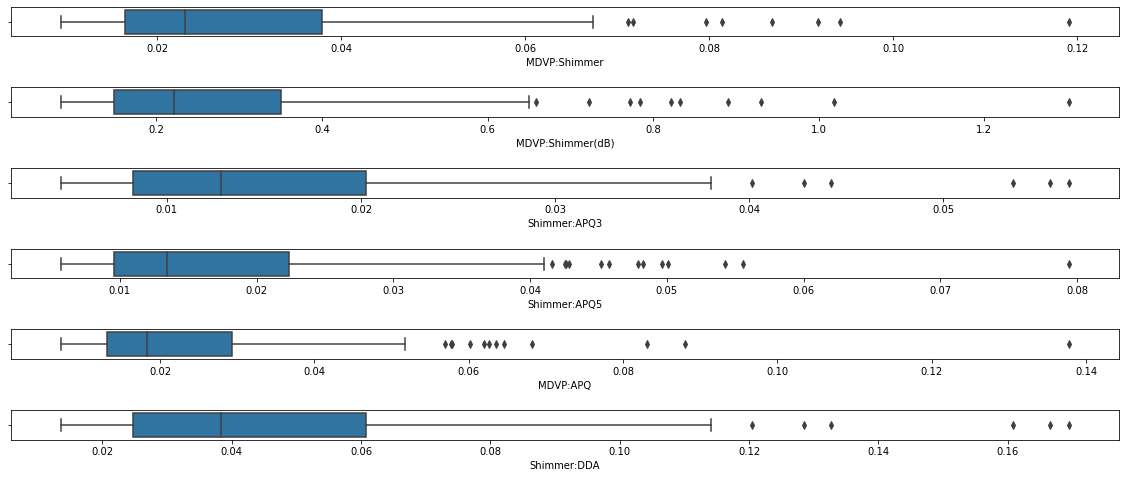

In [17]:
plt.figure(figsize=(16,7))
plt.subplot(6,1,1)
sns.boxplot(park['MDVP:Shimmer'])


plt.subplot(6,1,2)
sns.boxplot(park['MDVP:Shimmer(dB)'])


plt.subplot(6,1,3)
sns.boxplot(park['Shimmer:APQ3'])


plt.subplot(6,1,4)
sns.boxplot(park['Shimmer:APQ5'])


plt.subplot(6,1,5)
sns.boxplot(park['MDVP:APQ'])


plt.subplot(6,1,6)
sns.boxplot(park['Shimmer:DDA'])

plt.tight_layout(pad=2.0)
plt.show()

**All attributes related to Shimmer are right skewed and have outliers.**

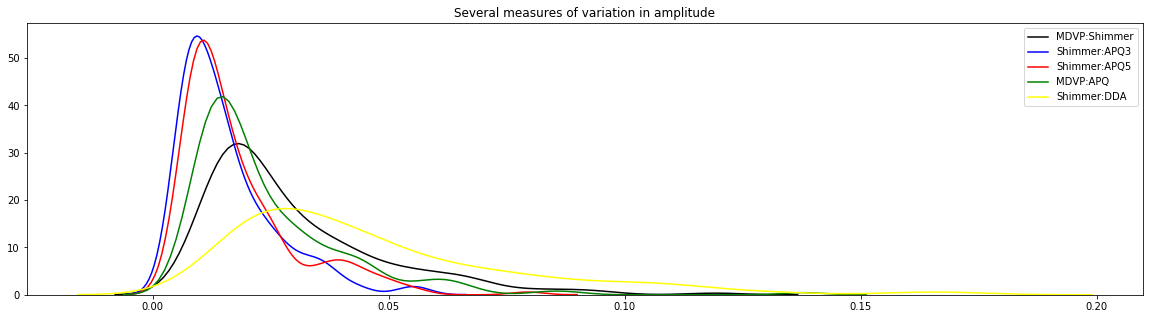

In [18]:
plt.figure(figsize=(20,5))
sns.distplot(park['MDVP:Shimmer'],color = 'k',hist=False,label='MDVP:Shimmer',axlabel=False)
sns.distplot(park['Shimmer:APQ3'],color= 'blue',hist=False,label='Shimmer:APQ3',axlabel=False)
sns.distplot(park['Shimmer:APQ5'],color = 'red',hist=False,label='Shimmer:APQ5',axlabel=False)
sns.distplot(park['MDVP:APQ'],color='green',hist=False,label='MDVP:APQ',axlabel=False)
sns.distplot(park['Shimmer:DDA'],color= 'yellow',hist=False,label='Shimmer:DDA',axlabel=False)
plt.title('Several measures of variation in amplitude')
plt.show()

**While the ditribution of various measures of amplitude have somewhat normal distribution, all of the given distributions are more or less right skewed.**

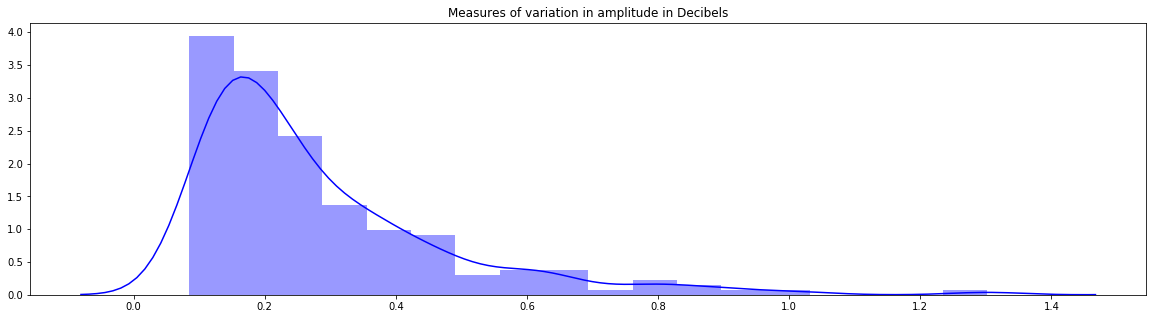

In [19]:
plt.figure(figsize=(20,5))
sns.distplot(park['MDVP:Shimmer(dB)'],color='blue',hist=True,label='MDVP:Shimmer(dB)',axlabel=False)
plt.title('Measures of variation in amplitude in Decibels')
plt.show()

**The Skewness and Kurtosis values of the given parameters are given below.**

In [20]:
park['MDVP:Shimmer'].skew(),park['MDVP:Shimmer(dB)'].skew(),park['Shimmer:APQ3'].skew(),park['Shimmer:APQ5'].skew(),park['MDVP:APQ'].skew(),park['Shimmer:DDA'].skew()

(1.6664804101559663,
 1.999388639086127,
 1.5805763798815677,
 1.798697066537622,
 2.618046502215422,
 1.5806179936782263)

In [21]:
park['MDVP:Shimmer'].skew(),park['MDVP:Shimmer(dB)'].kurtosis(),park['Shimmer:APQ3'].kurtosis(),park['Shimmer:APQ5'].kurtosis(),park['MDVP:APQ'].kurtosis(),park['Shimmer:DDA'].kurtosis()

(1.6664804101559663,
 5.128192509867997,
 2.7201516395960734,
 3.8742096517587257,
 11.163288378025502,
 2.720661344498221)

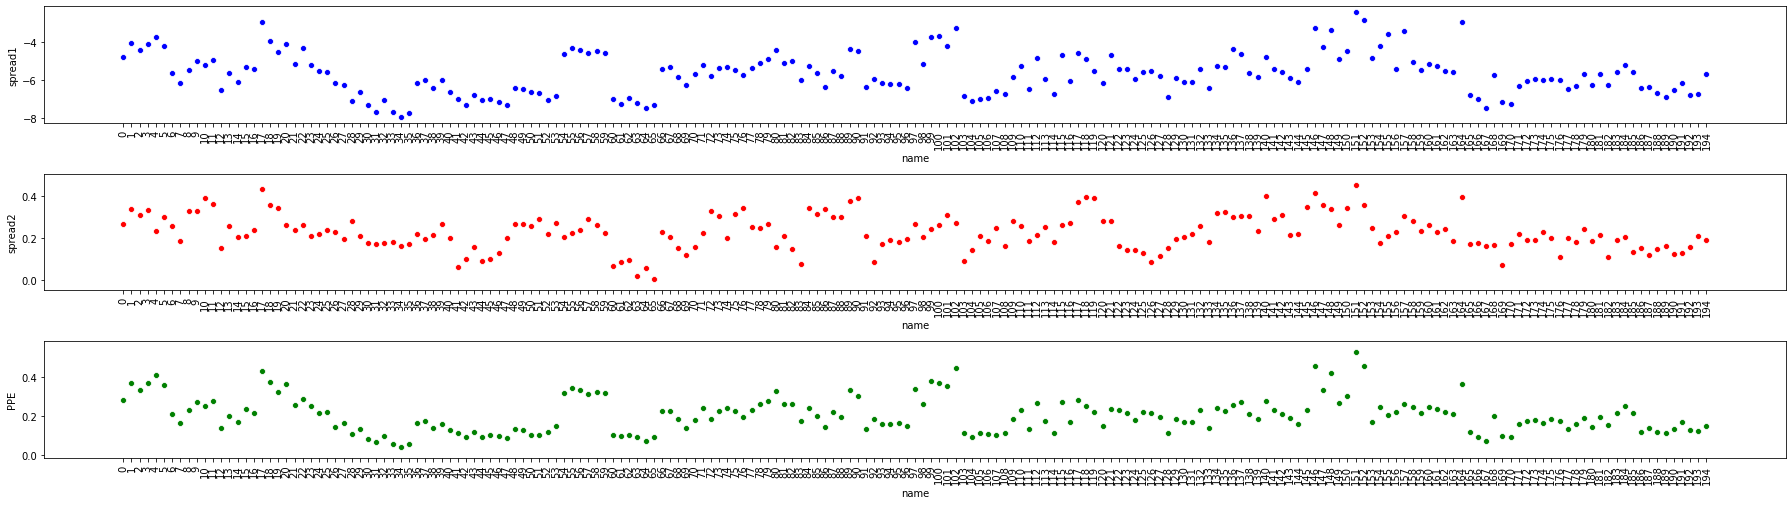

In [22]:
plt.figure(figsize=(25,7))
plt.subplot(3,1,1)
sns.scatterplot(x=park['name'],y=park['spread1'],color='blue')
plt.xticks(rotation=90)
plt.subplot(3,1,2)
sns.scatterplot(x=park['name'],y=park['spread2'],color='red')
plt.xticks(rotation=90)
plt.subplot(3,1,3)
sns.scatterplot(x=park['name'],y=park['PPE'],color='green')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

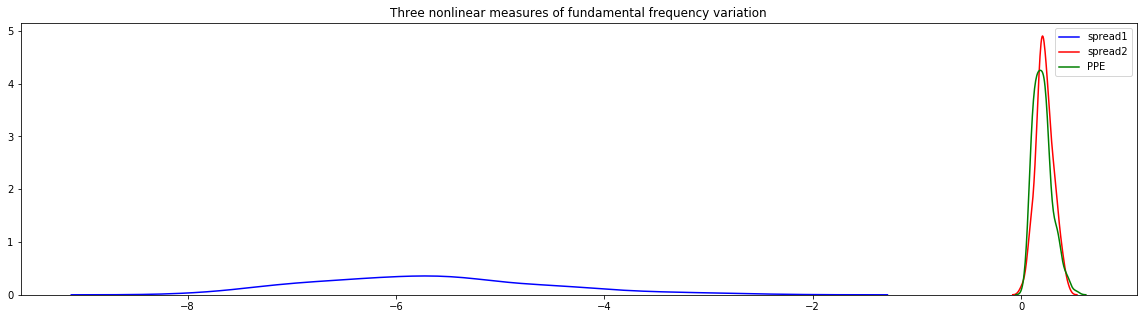

In [23]:
plt.figure(figsize=(20,5))
sns.distplot(park['spread1'],color= 'blue',hist=False,label='spread1',axlabel=False)
sns.distplot(park['spread2'],color = 'red',hist=False,label='spread2',axlabel=False)
sns.distplot(park['PPE'],color='green',hist=False,label='PPE',axlabel=False)
plt.title('Three nonlinear measures of fundamental frequency variation')
plt.show()

**The spread1 is ditributed on the negative x axis while spread2 and PPE are measures on the positive x axis.**

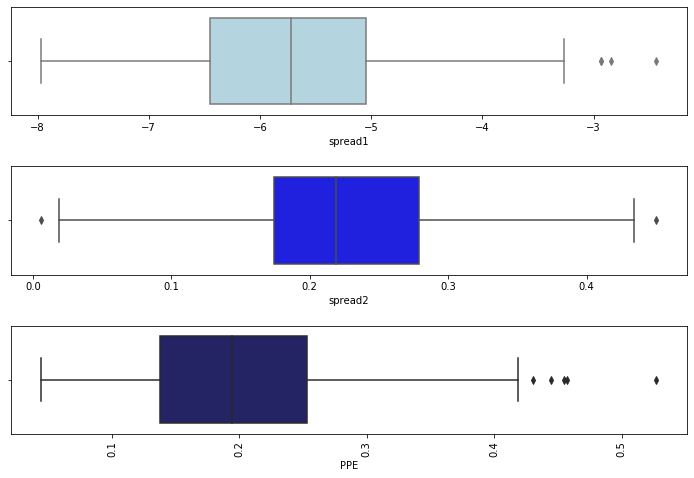

In [24]:
plt.figure(figsize=(10,7))
plt.subplot(3,1,1)
sns.boxplot(park['spread1'],color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(park['spread2'],color='blue')

plt.subplot(3,1,3)
sns.boxplot(park['PPE'],color='midnightblue')

plt.xticks(rotation=90)
plt.tight_layout(pad=2)
plt.show()

**Spread2 has fewest outliers and normal distribution.**

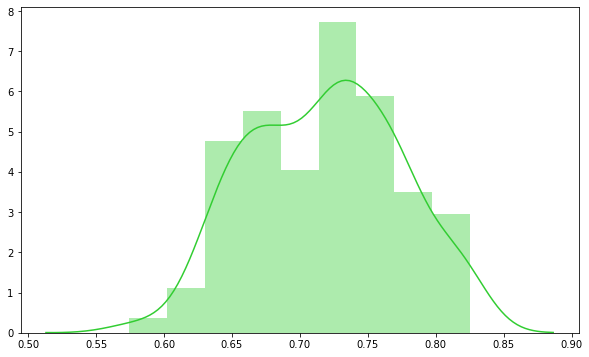

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(park['DFA'],color ='limegreen',hist=True,kde=True,label='Signal fractal scaling exponent',axlabel=False)
plt.show()

**The two peaks on the Signal fractal scaling exponent(DFA) may or may not be due to Parkinson disease.**

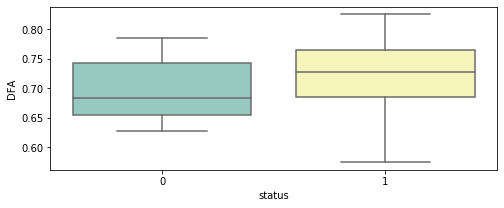

In [26]:
plt.figure(figsize=(8,3))
sns.boxplot(y=park['DFA'],x=park['status'],palette='Set3')
plt.show()

*The people with Parkinson's disease have higher dispersion of DFA values.*

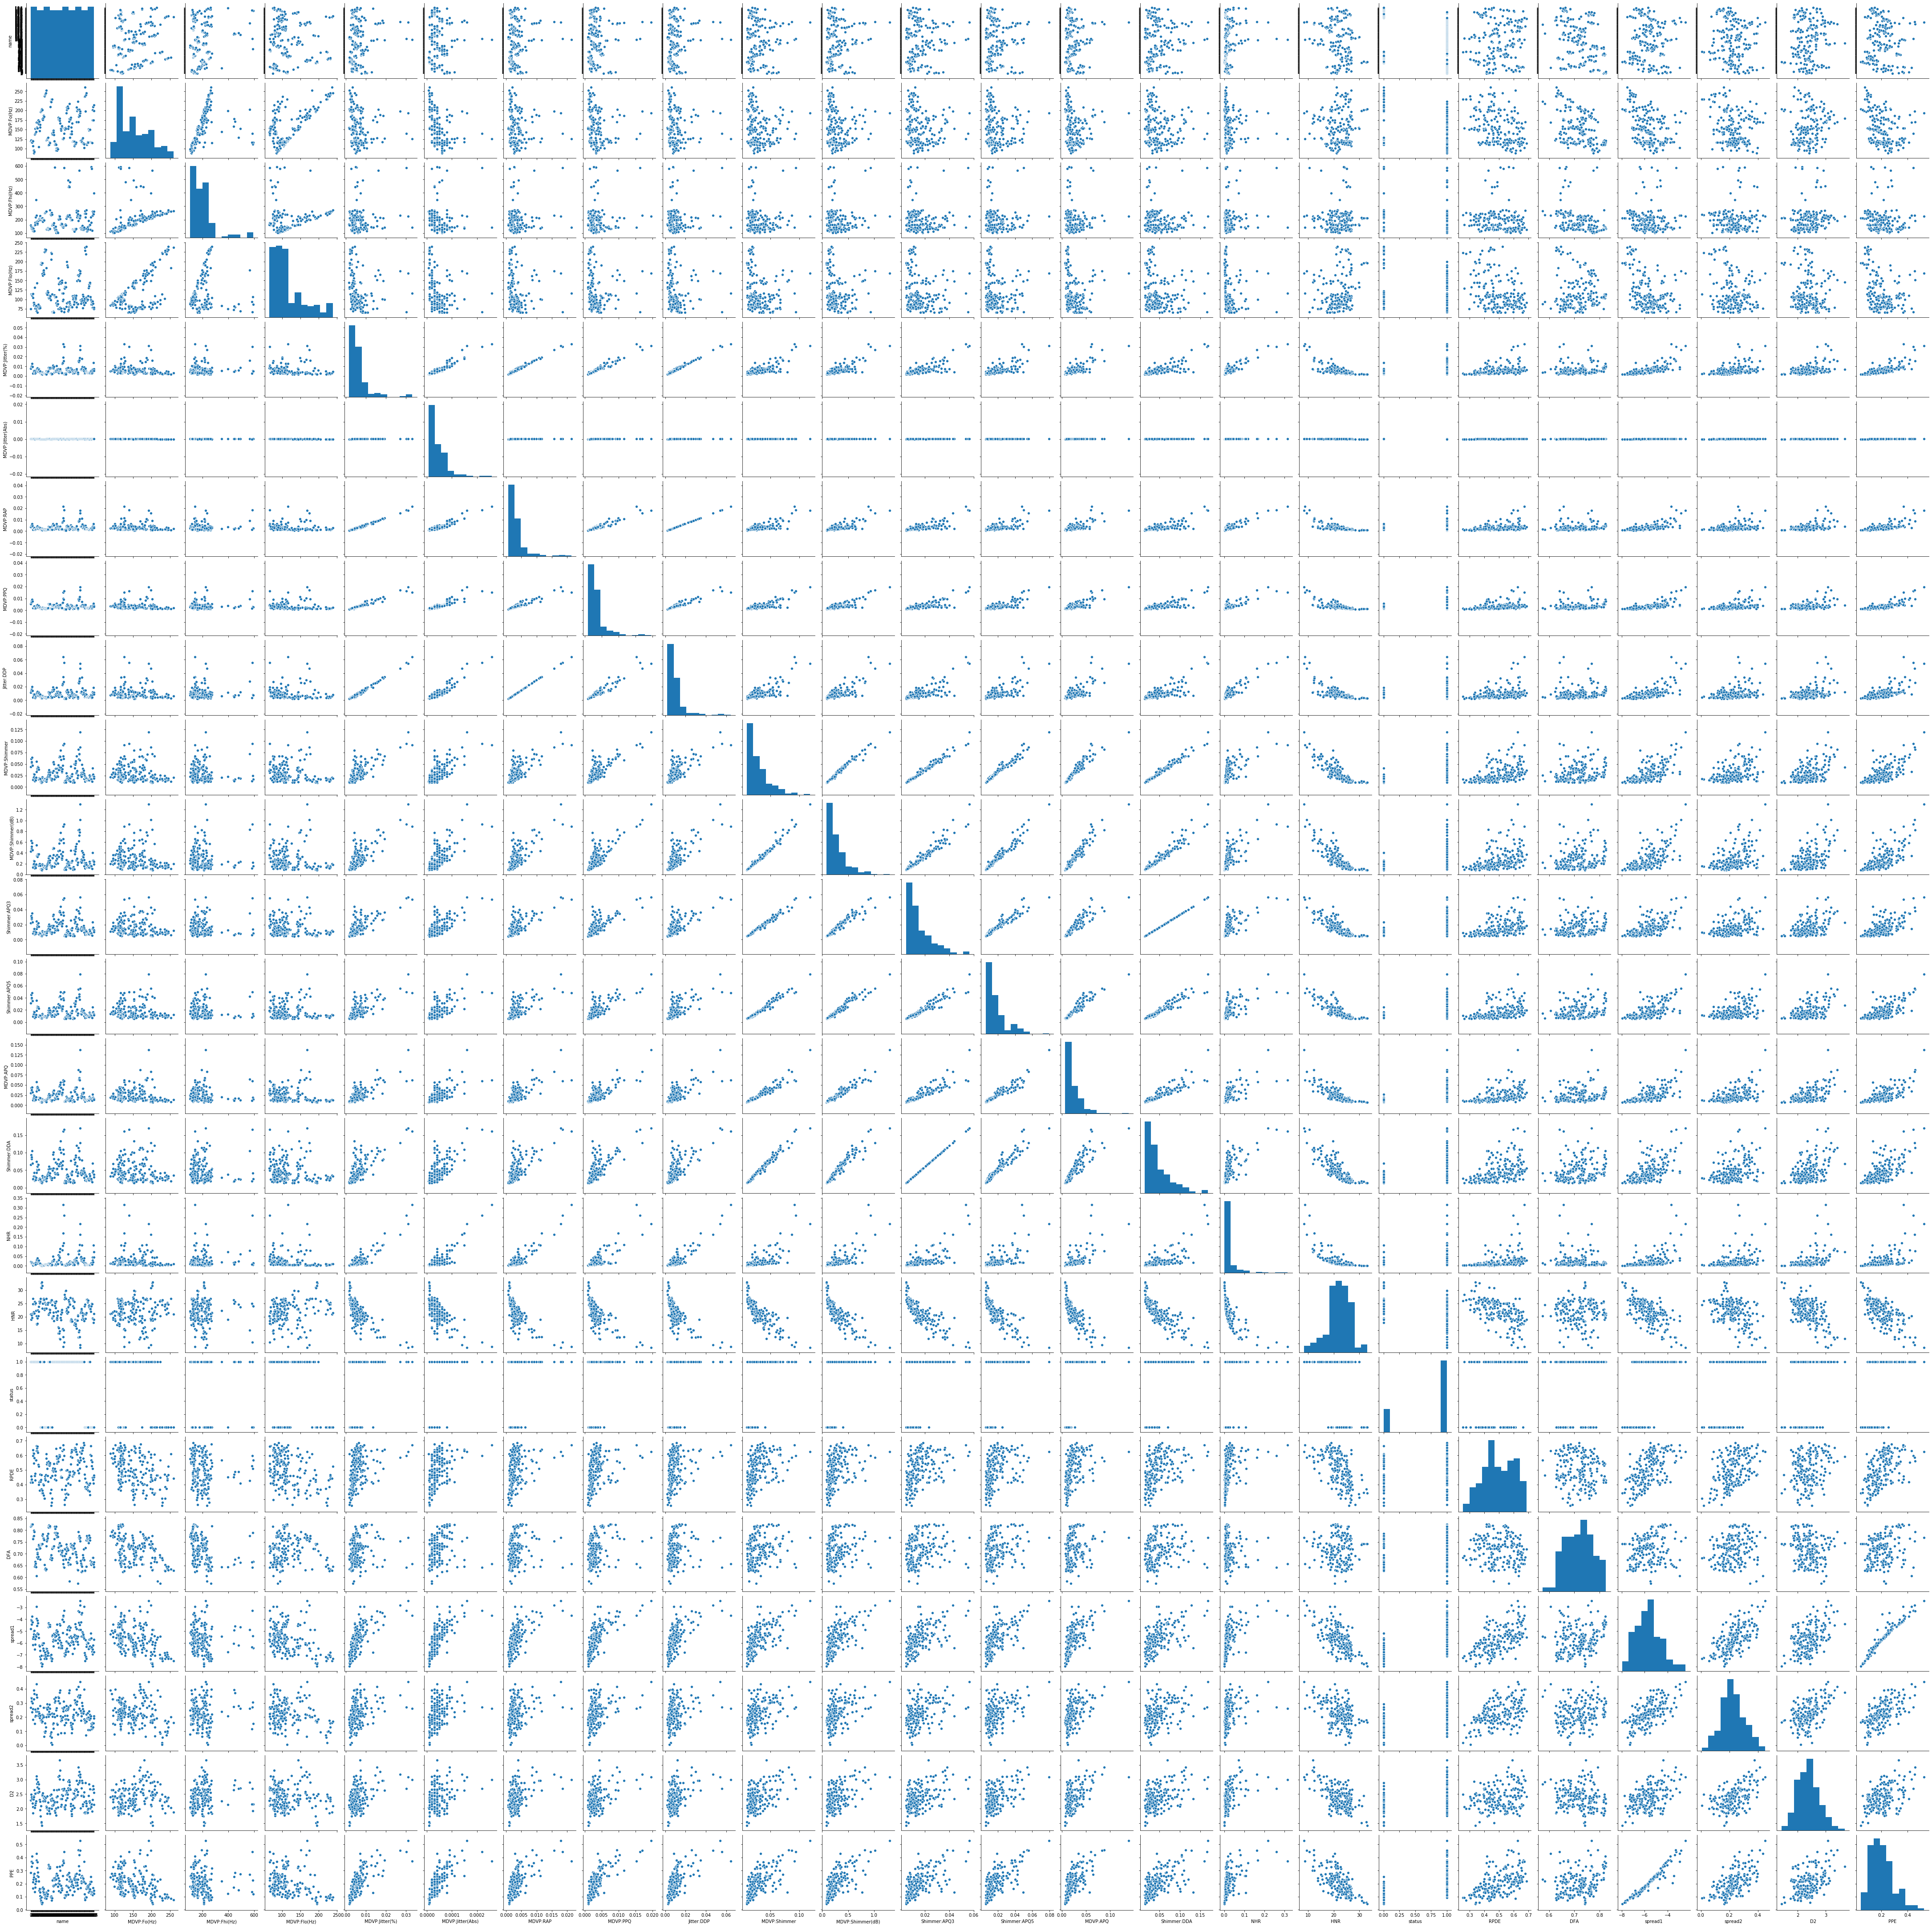

In [27]:
sns.pairplot(park)

In [28]:
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
sns.violinplot(x=park['HNR'],hue=park['status'],orient='v',palette='Set1')


plt.subplot(2,1,2)
sns.violinplot(x=park['NHR'],hue=park['status'],orient='v',palette='Set2')

plt.show()


**NHR is distributed near the 0 and HNR is distributed near 25.**

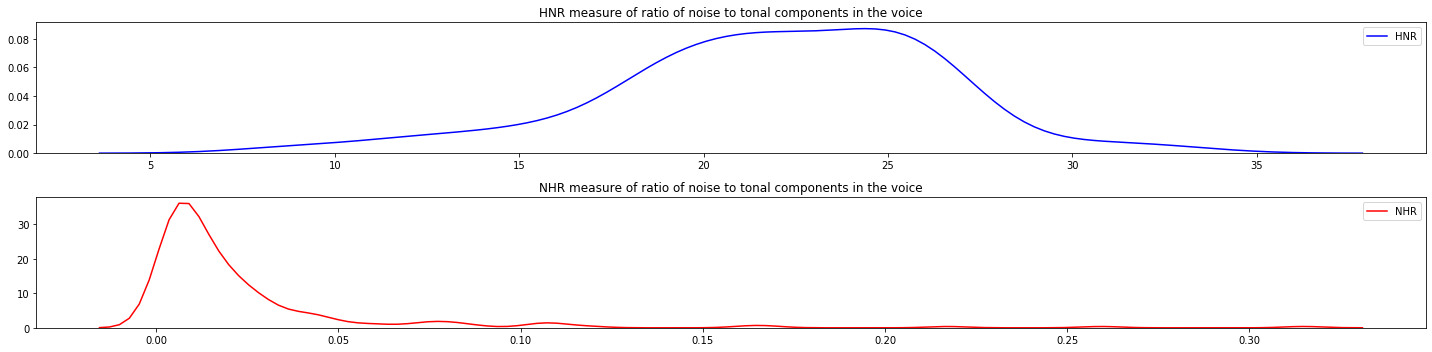

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.distplot(park['HNR'],color= 'blue',hist=False,label='HNR',axlabel=False)
plt.title('HNR measure of ratio of noise to tonal components in the voice')
plt.subplot(2,1,2)
sns.distplot(park['NHR'],color = 'red',hist=False,label='NHR',axlabel=False)
plt.title('NHR measure of ratio of noise to tonal components in the voice')
plt.tight_layout()
plt.show()

<p><span style="font-family: Calibri, sans-serif; font-size: 19px;"><strong><em>Bivariate Analysis of the Attributes</em></strong></span></p>

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=park['NHR'],y=park['HNR'],hue=park['status'],palette='Set1')
plt.show()

**People with Parkinson disease seem to have higher NHR values.**

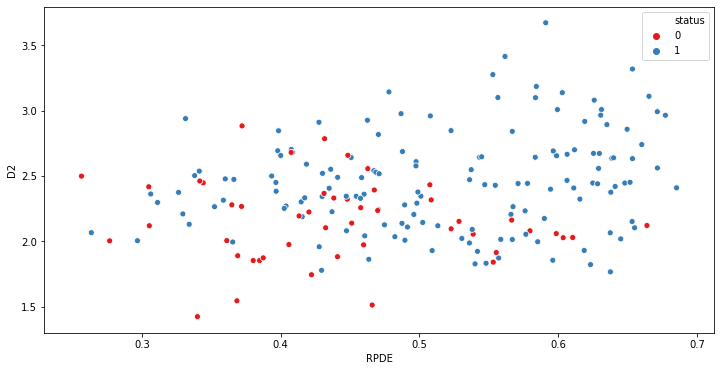

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=park['RPDE'],y=park['D2'],hue=park['status'],palette='Set1')
plt.show()

**People with high values of RPDE and D2(Two nonlinear dynamical complexity measures) have Parkinson's disease.**

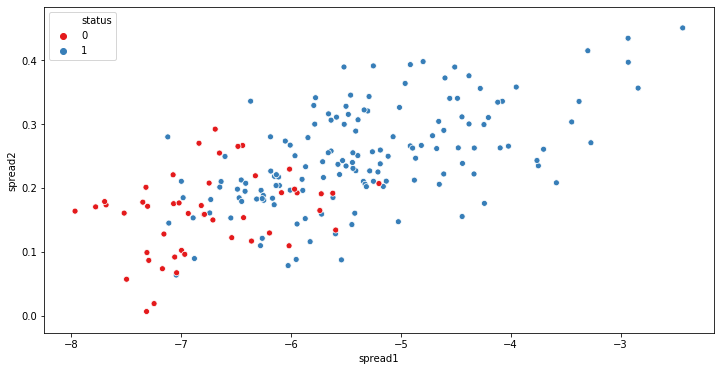

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=park['spread1'],y=park['spread2'],hue=park['status'],palette='Set1')
plt.show()

**If the values of both spread1 and spread2 are high, it implies higher probability of having the Parkinson's disease.**

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=park['PPE'],y=park['spread1'],hue=park['status'],palette='Set1')
plt.show()

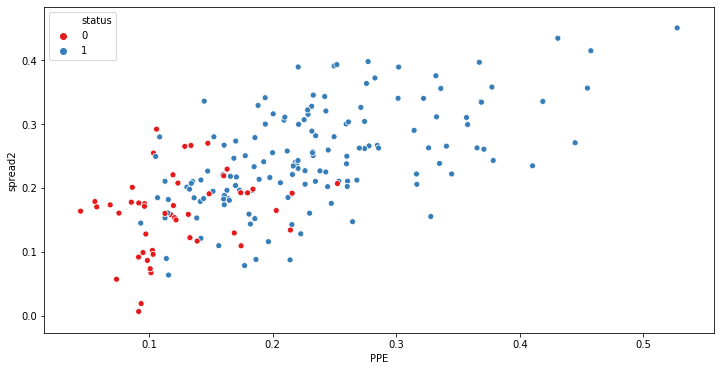

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=park['PPE'],y=park['spread2'],hue=park['status'],palette='Set1')
plt.show()

**The PPE value greater than 0.3 suggests very high probabiity of Parkinson's.**

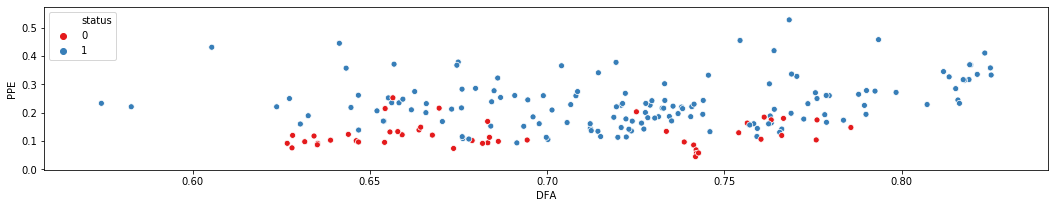

In [35]:
plt.figure(figsize=(18,3))
sns.scatterplot(x=park['DFA'],y=park['PPE'],hue=park['status'],palette='Set1')
plt.show()

**The DFA value greater than 0.8 suggests very high probabiity of Parkinson's.**

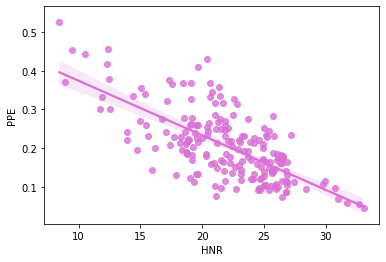

In [36]:
sns.regplot(x=park['HNR'],y=park['PPE'],color='orchid')

**There is negative correlation between HNR and PPE.**

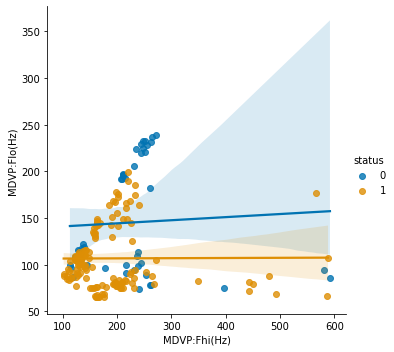

In [37]:
sns.lmplot(x='MDVP:Fhi(Hz)',y='MDVP:Flo(Hz)',hue='status',data=park,palette='colorblind')

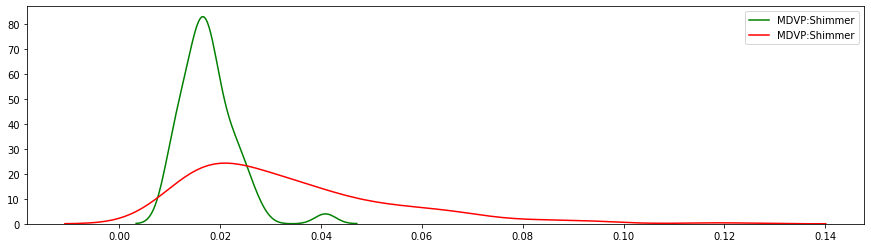

In [38]:
plt.figure(figsize=(15,4))
sns.distplot(park['MDVP:Shimmer'][park['status']==0],color = 'green',hist=False,label='MDVP:Shimmer',axlabel=False)
sns.distplot(park['MDVP:Shimmer'][park['status']==1],color = 'red',hist=False,label='MDVP:Shimmer',axlabel=False)

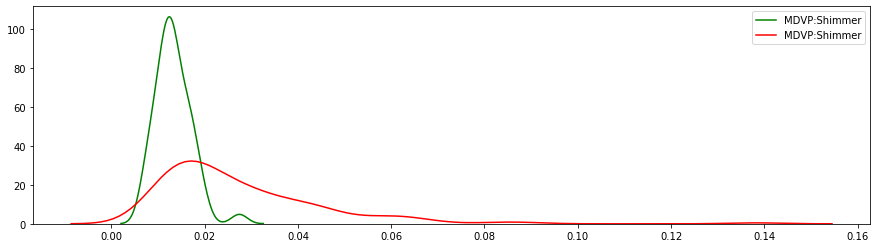

In [39]:
plt.figure(figsize=(15,4))
sns.distplot(park['MDVP:APQ'][park['status']==0],color = 'green',hist=False,label='MDVP:Shimmer',axlabel=False)
sns.distplot(park['MDVP:APQ'][park['status']==1],color = 'red',hist=False,label='MDVP:Shimmer',axlabel=False)

In [40]:
plt.figure(figsize=(15,4))
sns.distplot(park['Shimmer:APQ3'][park['status']==0],color = 'green',hist=False,label='MDVP:Shimmer',axlabel=False)
sns.distplot(park['Shimmer:APQ3'][park['status']==1],color = 'red',hist=False,label='MDVP:Shimmer',axlabel=False)

In [41]:
plt.figure(figsize=(15,4))
sns.distplot(park['Shimmer:APQ5'][park['status']==0],color = 'green',hist=False,label='MDVP:Shimmer',axlabel=False)
sns.distplot(park['Shimmer:APQ5'][park['status']==1],color = 'red',hist=False,label='MDVP:Shimmer',axlabel=False)

**The various values of measures of variation in amplitude suggest that the Parkinsons patients are not able to reach the peak amplitude and the right skewness for the associated graph is very high.**

In [42]:
park.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

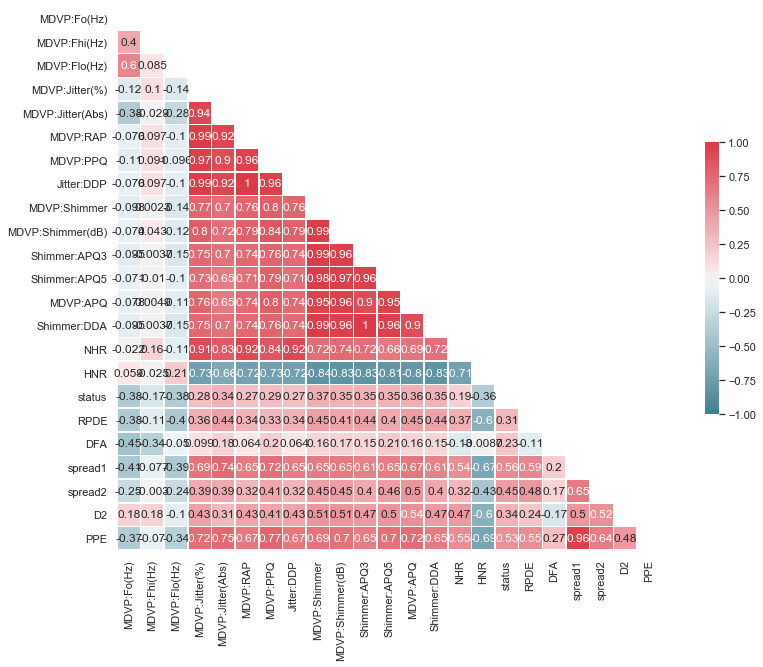

In [43]:
sns.set(style="white")

# Compute the correlation matrix
corr = park.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

**The correlation heat map suggests that a lot of attributes have a very high correlation. We should drop the attributes having corr>0.8.**

In [44]:
# dropping one of the attributes having high correlation
park.drop('MDVP:Jitter(%)',inplace=True,axis=1)
park.drop('spread1',inplace=True,axis=1)
park.drop('spread2',inplace=True,axis=1)
park.drop('MDVP:RAP',inplace=True,axis=1)
park.drop('MDVP:PPQ',inplace=True,axis=1)
park.drop('MDVP:Shimmer(dB)',inplace=True,axis=1)
park.drop('Shimmer:APQ3',inplace=True,axis=1)
park.drop('Shimmer:APQ5',inplace=True,axis=1)
park.drop('MDVP:Shimmer',inplace=True,axis=1)
park.drop('Jitter:DDP',inplace=True,axis=1)
park.drop('Shimmer:DDA',inplace=True,axis=1)
park.drop('MDVP:Jitter(Abs)',inplace=True,axis=1)

In [45]:
park.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:APQ',
       'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'D2', 'PPE'],
      dtype='object')

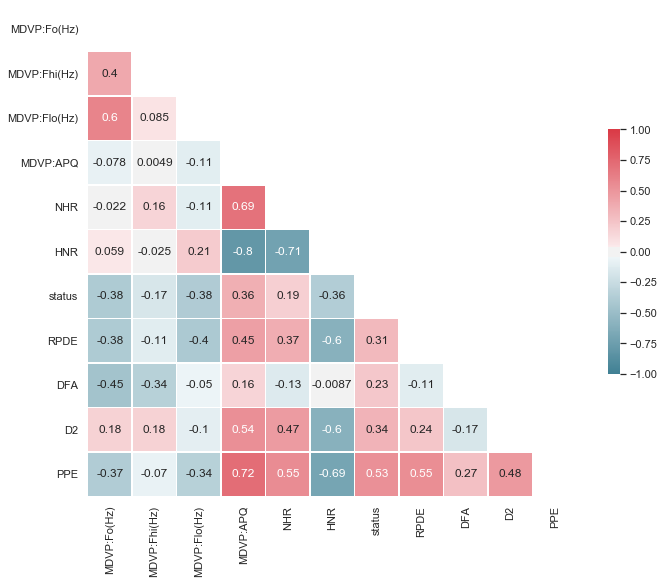

In [46]:
sns.set(style="white")

# Compute the correlation matrix
corr = park.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

**There are no attributes with correlation of 0.8 or more.**

In [47]:
park1=park.copy(deep=True)
park1.drop('name',axis=1,inplace=True)
sns.pairplot(park1)

In [48]:
 from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [49]:
# Splitting data based on key
# independant variables
X= park.drop(['status','name'],axis=1)
# the dependent variable
y=park['status']

<p><span style="color: rgb(41, 105, 176); font-size: 20px; font-family: Calibri, sans-serif;">4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).</span></p>

In [50]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 99) #70:30 Ratio for data

<p><span style="color: rgb(41, 105, 176); font-size: 20px; font-family: Calibri, sans-serif;">5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc.</span></p>

In [51]:
#Counting null values.
X_train.isnull().sum()

MDVP:Fo(Hz)     0
MDVP:Fhi(Hz)    0
MDVP:Flo(Hz)    0
MDVP:APQ        0
NHR             0
HNR             0
RPDE            0
DFA             0
D2              0
PPE             0
dtype: int64

In [52]:
#Scales the data. Essentially returns the z-scores of every attribute
#This is normalization of independent variables to ensure that different scales do not cause issues in the model.

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
X_train[X_train.columns] = std_scale.fit_transform(X_train[X_train.columns])
X_train.describe()

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cools\Anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\cools\Anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)      MDVP:APQ           NHR  \
count  1.360000e+02  1.360000e+02  1.360000e+02  1.360000e+02  1.360000e+02   
mean   2.563309e-16 -2.351061e-16 -3.208218e-16  1.624518e-16 -1.485740e-16   
std    1.003697e+00  1.003697e+00  1.003697e+00  1.003697e+00  1.003697e+00   
min   -1.651018e+00 -1.233549e+00 -1.166141e+00 -9.872052e-01 -6.093793e-01   
25%   -8.885698e-01 -7.352110e-01 -7.592704e-01 -6.523110e-01 -4.757213e-01   
50%   -1.071520e-01 -1.716521e-01 -2.821671e-01 -3.301990e-01 -3.382258e-01   
75%    8.041286e-01  4.203040e-01  4.677938e-01  3.087700e-01 -1.418482e-02   
max    2.434740e+00  5.706961e+00  2.912406e+00  6.431596e+00  6.926073e+00   

                HNR          RPDE           DFA            D2           PPE  
count  1.360000e+02  1.360000e+02  1.360000e+02  1.360000e+02  1.360000e+02  
mean  -3.085767e-16  1.015017e-15 -3.635266e-17  7.069508e-16  9.836903e-17  
std    1.003697e+00  1.003697e+00  1.003697e+00  1.003697e+00  1.003697e+00  
min   -3.016079e+00 -2.203608e+00 -2.660559e+00 -2.509414e+00 -1.784173e+00  
25%   -6.124646e-01 -7.921676e-01 -7.318798e-01 -7.956683e-01 -7.361291e-01  
50%   -1.900860e-02 -2.488422e-02  6.402643e-02 -2.708336e-02 -1.410288e-01  
75%    7.190734e-01  9.277991e-01  7.319330e-01  6.169382e-01  5.591098e-01  
max    2.516248e+00  1.643073e+00  1.997122e+00  2.433209e+00  3.478397e+00

In [54]:
X_test[X_test.columns] = std_scale.fit_transform(X_test[X_test.columns])
X_test.describe()

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cools\Anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\cools\Anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)      MDVP:APQ           NHR  \
count  5.900000e+01  5.900000e+01  5.900000e+01  5.900000e+01  5.900000e+01   
mean   9.408670e-18 -4.704335e-17  7.997369e-18  3.857555e-17 -1.307805e-16   
std    1.008584e+00  1.008584e+00  1.008584e+00  1.008584e+00  1.008584e+00   
min   -1.330783e+00 -8.714187e-01 -1.181214e+00 -9.888863e-01 -5.367733e-01   
25%   -8.339972e-01 -6.561218e-01 -7.081816e-01 -6.682260e-01 -4.465387e-01   
50%   -2.072293e-01 -4.136161e-01 -2.601874e-01 -4.044837e-01 -3.217867e-01   
75%    5.678267e-01  1.895230e-01  5.354576e-01  3.840958e-01  5.464380e-02   
max    2.443568e+00  2.999809e+00  2.620088e+00  4.309785e+00  6.447982e+00   

                HNR          RPDE           DFA            D2           PPE  
count  5.900000e+01  5.900000e+01  5.900000e+01  5.900000e+01  5.900000e+01  
mean  -5.645202e-18 -1.397187e-15 -2.517760e-15 -2.258081e-17 -6.021549e-17  
std    1.008584e+00  1.008584e+00  1.008584e+00  1.008584e+00  1.008584e+00  
min   -2.644683e+00 -2.521795e+00 -1.567832e+00 -1.724482e+00 -1.489546e+00  
25%   -5.575799e-01 -6.547467e-01 -9.918379e-01 -6.775956e-01 -8.306835e-01  
50%    2.905688e-01 -4.702846e-02  2.302518e-01 -1.275657e-01 -1.026592e-01  
75%    7.210431e-01  7.441451e-01  8.426743e-01  5.737795e-01  4.813508e-01  
max    1.796595e+00  2.030924e+00  1.797318e+00  3.159186e+00  2.987014e+00

**Both training and test data should be normalized.**

<p><span style="color: rgb(41, 105, 176); font-family: Calibri, sans-serif; font-size: 20px;">6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes&rsquo;, SVM, k-NN etc, and note down their accuracies on the test data.</span></p>

<p><strong><span style="font-size: 19px;">LOGISTIC REGRESSION</span></strong></p>

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

In [56]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8305084745762712


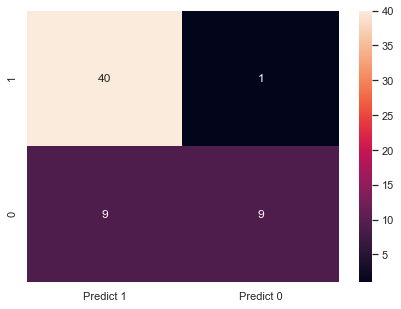

In [57]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [58]:
model.score(X_train, y_train)

0.9044117647058824

<p><strong><span style="font-size: 19px;">NAIVE BAYES CLASSIFICATION</span></strong></p>

In [59]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
diab_test_predict = diab_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.7966



Confusion Matrix


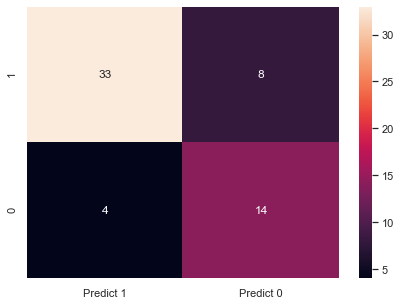

In [61]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [62]:
diab_test_predict = diab_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_test_predict)))
print()

Model Accuracy: 0.7794



<p><strong><span style="font-size: 19px;">KNN CLASSIFICATION</span></strong></p>

In [63]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [64]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [65]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8813559322033898

Confusion Matrix


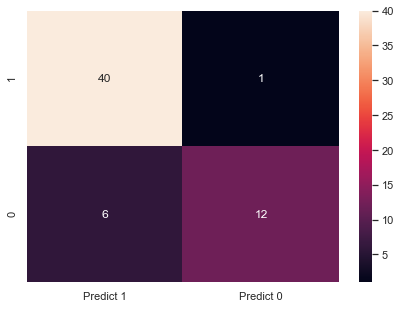

In [66]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [67]:
NNH.score(X_train, y_train)  # Checking for Overfitting

1.0

<p><span style="color: rgb(41, 105, 176); font-family: Calibri, sans-serif; font-size: 20px;">7. Train a meta-classifier and note the accuracy on test data.</span></p>

<p><strong><span style="font-size: 19px;">DECISION TREE</span></strong></p>

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from IPython.display import Image 
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=99,max_depth=2)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [69]:
print(dTree.score(X_train, y_train)) #checking for overfitting
print(dTree.score(X_test, y_test))

0.8897058823529411
0.7966101694915254


In [70]:
dTree_predict=dTree.predict(X_test)
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, dTree_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix


In [71]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

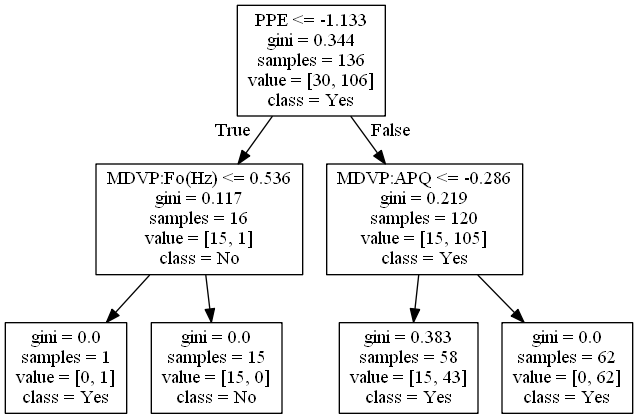

In [72]:

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


<p><span style="color: rgb(41, 105, 176); font-family: Calibri, sans-serif; font-size: 20px;">8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy.</span></p>

<p><span style="color: rgb(0, 0, 0); font-size: 20px;"></span><span style="color: rgb(0, 0, 0); font-size: 19px;"><strong>BAGGING CLASSIFIER</strong></span></p>

In [73]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=10,random_state=99)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.7796610169491526


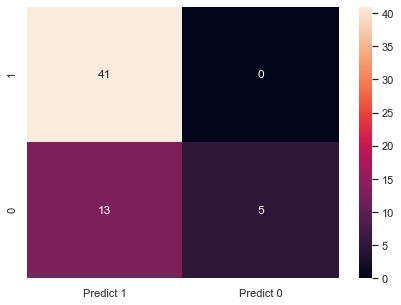

In [74]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


In [75]:
print(bgcl.score(X_train,y_train)) #Checking Overfitting

0.8970588235294118


<p><span style="color: rgb(0, 0, 0); font-size: 20px;"></span><span style="color: rgb(0, 0, 0); font-size: 19px;"><strong>BOOSTING  CLASSIFIER</strong></span></p>

In [79]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=99)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8813559322033898


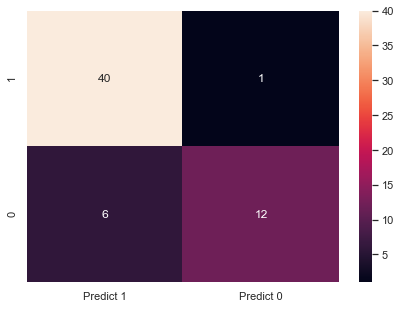

In [80]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


In [81]:
print(abcl.score(X_train , y_train)) #Checking Overfitting

0.9705882352941176


<p><span style="color: rgb(41, 105, 176); font-family: Calibri, sans-serif; font-size: 20px;">9. Compare all the models (minimum 5) and pick the best one among them.</span></p>

<p><br></p>
<table style="width: 65%; margin-right: calc(31%); margin-left: calc(4%);">
    <tbody>
        <tr>
            <td style="width: 21.2206%; text-align: left;"><span style="color: rgb(41, 105, 176);"><strong><u>Algorithm</u></strong></span></td>
            <td style="width: 25.1831%; text-align: left;"><span style="color: rgb(41, 105, 176);"><strong><u>Accuracy Testing</u></strong></span></td>
            <td style="width: 22.1795%; text-align: left;"><span style="color: rgb(41, 105, 176);"><strong><u>Accuracy&nbsp;</u></strong><strong><u>Training</u></strong></span></td>
            <td style="width: 17.8564%; text-align: left;"><span style="color: rgb(41, 105, 176);"><u><strong>GAP&nbsp;</strong></u><strong><u>in Accuracy</u></strong></span></td>
            <td style="width: 16.5984%; text-align: left; vertical-align: middle;"><span style="color: rgb(41, 105, 176);"><u><strong>Overfitting(Y/N)</strong></u></span></td>
        </tr>
        <tr>
            <td style="width: 21.2206%; text-align: left; vertical-align: middle;">Logistic Regression</td>
            <td style="width: 25.1831%; text-align: left; vertical-align: middle;">83 %</td>
            <td style="width: 22.1795%; vertical-align: middle; text-align: left;">90%</td>
            <td style="width: 17.8564%; vertical-align: middle; text-align: left;">7%</td>
            <td style="width: 16.5984%; vertical-align: middle; text-align: left;">Y</td>
        </tr>
        <tr>
            <td style="width: 21.2206%; text-align: left; vertical-align: middle;">Naive Bayes</td>
            <td style="width: 25.1831%; text-align: left; vertical-align: middle;">79 %</td>
            <td style="width: 22.1795%; vertical-align: middle; text-align: left;">77%</td>
            <td style="width: 17.8564%; vertical-align: middle; text-align: left;">2%</td>
            <td style="width: 16.5984%; vertical-align: middle; text-align: left;">N</td>
        </tr>
        <tr>
            <td style="width: 21.2206%; text-align: left; vertical-align: middle;">KNN</td>
            <td style="width: 25.1831%; text-align: left; vertical-align: middle;">88 %</td>
            <td style="width: 22.1795%; vertical-align: middle; text-align: left;">100 %</td>
            <td style="width: 17.8564%; vertical-align: middle; text-align: left;">12%</td>
            <td style="width: 16.5984%; vertical-align: middle; text-align: left;">Y</td>
        </tr>
        <tr>
            <td style="width: 21.2206%; text-align: left; vertical-align: middle;">Decision Tree</td>
            <td style="width: 25.1831%; text-align: left; vertical-align: middle;">79 %</td>
            <td style="width: 22.1795%; vertical-align: middle; text-align: left;">89%</td>
            <td style="width: 17.8564%; vertical-align: middle; text-align: left;">10%</td>
            <td style="width: 16.5984%; vertical-align: middle; text-align: left;">Y</td>
        </tr>
        <tr>
            <td style="width: 21.2206%; text-align: left; vertical-align: middle;">Bagging</td>
            <td style="width: 25.1831%; text-align: left; vertical-align: middle;">77 %</td>
            <td style="width: 22.1795%; vertical-align: middle; text-align: left;">89 %</td>
            <td style="width: 17.8564%; vertical-align: middle; text-align: left;">12%</td>
            <td style="width: 16.5984%; vertical-align: middle; text-align: left;">Y</td>
        </tr>
        <tr>
            <td style="width: 21.2206%; text-align: left; vertical-align: middle;">Boosting</td>
            <td style="width: 25.1831%; text-align: left; vertical-align: middle;">88 %</td>
            <td style="width: 22.1795%; vertical-align: middle; text-align: left;">97 %</td>
            <td style="width: 17.8564%; vertical-align: middle; text-align: left;">9%</td>
            <td style="width: 16.5984%; vertical-align: middle; text-align: left;">Y</td>
        </tr>
    </tbody>
</table>

<p><span style='color: rgb(40, 50, 78); font-family: "Times New Roman", Times, serif; font-size: 18px;'>Before discussing the efficacy of various algorithms, we must discuss the limitation of the given dataset. The data provided to us has only 195 instances.Out of which around 145 patients have Parkinsons while rest don&#39;t. The total number of samples is very low and it is also not a true representation of the overall samples possible in a society.The less number of samples makes it possible for some of our models to overfit causing low accuracy in testing data.</span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 18px;"><span style="font-family: 'Times New Roman', Times, serif;">If we look at the models we have implemented on the given dataset, we see that KNN has higher testing accuracy, but we should note that KNN has 100% accuracy on testing data indicating that it overfitted on the given dataset. In an ideal situation ensemble models almost always have higher accuracy over the simple supervised learning classifiers.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 18px;"><span style="font-family: 'Times New Roman', Times, serif;">However , we see that bagging is having accuracy similar or even lower than other methods. This is because boosting depends on samples from the original dataset. Since the original data-set is itself small , the bagging method does not improve accuracy of our predictions.Boosting method on the other hand gives better accuracy as it increases the weight of each misclassified attribute.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 18px;"><span style="font-family: 'Times New Roman', Times, serif;">Although we expected the ensemble models to perform better which boosting does and gives a higher accuracy of 88% but it also causes &nbsp;overfitting. On the other hand Naive Bayes may have given lower accuracy than Boosting but the training and testing data suggests that it does not over-fit. Hence it is the best algorithm in the given scenario.</span></span></span></p>

<p><span style='color: rgb(41, 105, 176); font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-size: 20px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: left; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>--------------------------------------------------------------Thank You---------------------------------------------------------------</span> </p>